<a href="https://colab.research.google.com/github/nafrielramadhan/classification-and-regression-tree/blob/main/classification_and_regression_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Fakultas Ilmu Komputer, Universitas Indonesia

Questions answered by: Muhammad Nafriel Ramadhan
##**Topic: Classification And Regression Tree (CART)**

</center>

## Deskripsi Dataset

Lab ini akan menggunakan 2 dataset, yakni dataset untuk klasifikasi dan dataset untuk regresi.

Dataset yang digunakan untuk klasifikasi adalah dataset **Obesity or CVD risk** (https://kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/data) dengan modifikasi.

Dataset yang akan digunakan untuk regresi adalah dataset **Student Performance** (https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data) dengan modifikasi.

### Deskripsi Dataset Klasifikasi

Dataset ini terdiri atas atribut-atribut yang dirasa berpengaruh terhadap tingkat obesitas pada orang-orang dari negara Meksiko, Peru, dan Kolombia, dengan rentang usia 14 hingga 61 tahun.

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:


*   **Gender**: Jenis Kelamin.
*   **Age**: Umur.
*   **Height**: Tinggi Badan.
*   **Weight**: Berat Badan.
*   **family_history_with_overweight**: Atribut biner (yes atau no) yang menyatakan apakah ada anggota keluarga yang menderita kelebihan berat badan.
*   **FAVC**: Atribut biner (yes atau no) yang menyatakan apakah orang tersebut sering mengonsumsi makanan berkalori tinggi.
*   **FCVC**: Frekuensi seseorang mengonsumsi sayur-sayuran.
*   **NCP**: Jumlah makan utama seseorang (main meals).
*   **CAEC**: Konsumsi makanan di antara waktu makan (Consumption of food between meals).
*   **SMOKE**: Atribut biner (yes atau no) yang menyatakan apakah seseorang merokok atau tidak.
*   **CH2O**: Konsumsi air setiap hari.
*   **SCC**: Atribut biner (yes atau no) yang menyatakan apakah seseorang melakukan pemantauan konsumsi kalori.
*   **FAF**: Frekuensi aktivitas fisik.
*   **TUE**: Waktu menggunakan perangkat teknologi.
*   **CALC**: Konsumsi alkohol.
*   **MTRANS**: Transportasi yang digunakan.

Dengan target variabel:
*   **ObesityLevel**: Level obesitas seseorang. Nilai dari target variabel ini terdiri atas:

  * *Underweight*
  * *Normal*
  * *Overweight I*
  * *Overweight II*
  * *Obesity I*
  * *Obesity II*
  * *Obesity III*

### Deskripsi Dataset Regresi

Dataset ini berisi informasi atribut-atribut yang akan digunakan untuk menguji faktor-faktor yang mempengaruhi performa akademik pelajar.

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:


*   **Hours Studied**: Jumlah total jam yang dihabiskan tiap siswa untuk belajar.
*   **Previous Score**: Skor yang diperoleh siswa pada tes sebelumnya.
*   **Extracurricular Activities**: Atribut  yang menyatakan apakah siswa berpartisipasi dalam kegiatan esktrakulikuler (Ya atau Tidak).
*   **Sleep Hours**: Jumlah rata-rata jam tidur siswa per hari.
*   **Sample Question Papers Practiced**: Jumlah contoh soal yang telah dikerjakan oleh siswa tersebut.

Dengan target variable:
*   **Performance Index**: Ukuran kinerja untuk keseluruhan performa siswa. Nilainya berkisar antara 10 hingga 100, dengan nilai yang lebih tinggi menunjukkan kinerja yang lebih baik.

## Import Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns

## Read Datasets

**Bacalah konten dari masing-masing dataset yang telah disediakan. Perhatikan tipe data dari masing-masing kolom, apakah sudah cocok untuk dijadikan input ke dalam model atau tidak.**

### Dataset Obesity Risk

**Terapkan proses Read Dataset di bawah cell ini**

In [ ]:
obesity_df = pd.read_csv("obesity_risk.csv")
obesity_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS,ObesityLevel
0,OBX0968,Male,24,1.700000,85.000000,yes,yes,2,3,Frequently,no,3.000000,0,1,Frequently,Public_Transportation,Overweight_Level_II
1,OBX0848,Female,21,1.486484,60.117993,yes,no,2,1,Sometimes,no,1.000000,0,0,no,Public_Transportation,Overweight_Level_II
2,OBX01416,Female,26,1.618867,110.777391,yes,yes,3,3,Sometimes,no,2.618198,0,0,Sometimes,Public_Transportation,Obesity_Type_III
3,OBX0761,Female,23,1.644161,84.340406,yes,yes,2,3,Sometimes,no,2.715572,2,0,no,Public_Transportation,Obesity_Type_I
4,OBX0604,Female,25,1.628470,107.218949,yes,yes,3,3,Sometimes,no,2.487070,0,0,Sometimes,Public_Transportation,Obesity_Type_III


### Dataset Student Performance

**Terapkan proses Read Dataset di bawah cell ini**

In [ ]:
student_performance_df = pd.read_csv("student_performance.csv")
student_performance_df.head()

,id,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,SP3194,1,75,Yes,9,5,50.0
1,SP3624,5,54,Yes,5,1,36.0
2,SP3631,3,51,No,7,6,34.0
3,SP2891,8,81,No,4,1,74.0
4,SP5757,9,58,No,8,7,59.0


## SOAL 1 Data Pre-processing [20]

**Terapkanlah proses data pre-processing pada bagian ini agar dataset yang telah diberikan dapat dijadikan input dari model yang akan kalian buat. Terapkan proses tersebut untuk masing-masing dataset (Obesity Risk & Student Performance). Pastikan dataset hingga benar-benar bisa langsung diproses oleh model dan jangan lupa pula untuk membaginya menjadi train dan test**

### Dataset Obesity Risk

**Terapkan proses data pre-processing di bawah cell ini**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

obesity_missing_values = obesity_df.isnull().sum()


le = LabelEncoder()
obesity_df_encoded = obesity_df.apply(le.fit_transform)

X_obesity = obesity_df_encoded.drop('ObesityLevel', axis=1)
y_obesity = obesity_df_encoded['ObesityLevel']

X_train_obes, X_test_obes, y_train_obes, y_test_obes = train_test_split(X_obesity, y_obesity, test_size=0.2, random_state=42)

obesity_missing_values

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
ObesityLevel                      0
dtype: int64

Tidak ada missing value dan tidak ada data redudancy, sehingga kita bisa langsung memisahkan train data dan test data.

### Dataset Student Performance

**Terapkan proses data pre-processing di bawah cell ini**

In [ ]:

student_performance_missing_values = student_performance_df.isnull().sum()

student_performance_df_encoded = student_performance_df.apply(le.fit_transform)


X_perf = student_performance_df_encoded.drop('Performance Index', axis=1)
y_perf = student_performance_df_encoded['Performance Index']

X_train_perform, X_test_perform, y_train_perform, y_test_perform = train_test_split(X_perf, y_perf, test_size=0.2, random_state=42)

student_performance_missing_values

id                                  0
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Tidak ada missing value dan tidak ada data redudancy, sehingga kita bisa langsung memisahkan train data dan test data.

Menangani outliers untuk obesity risk dan student performance

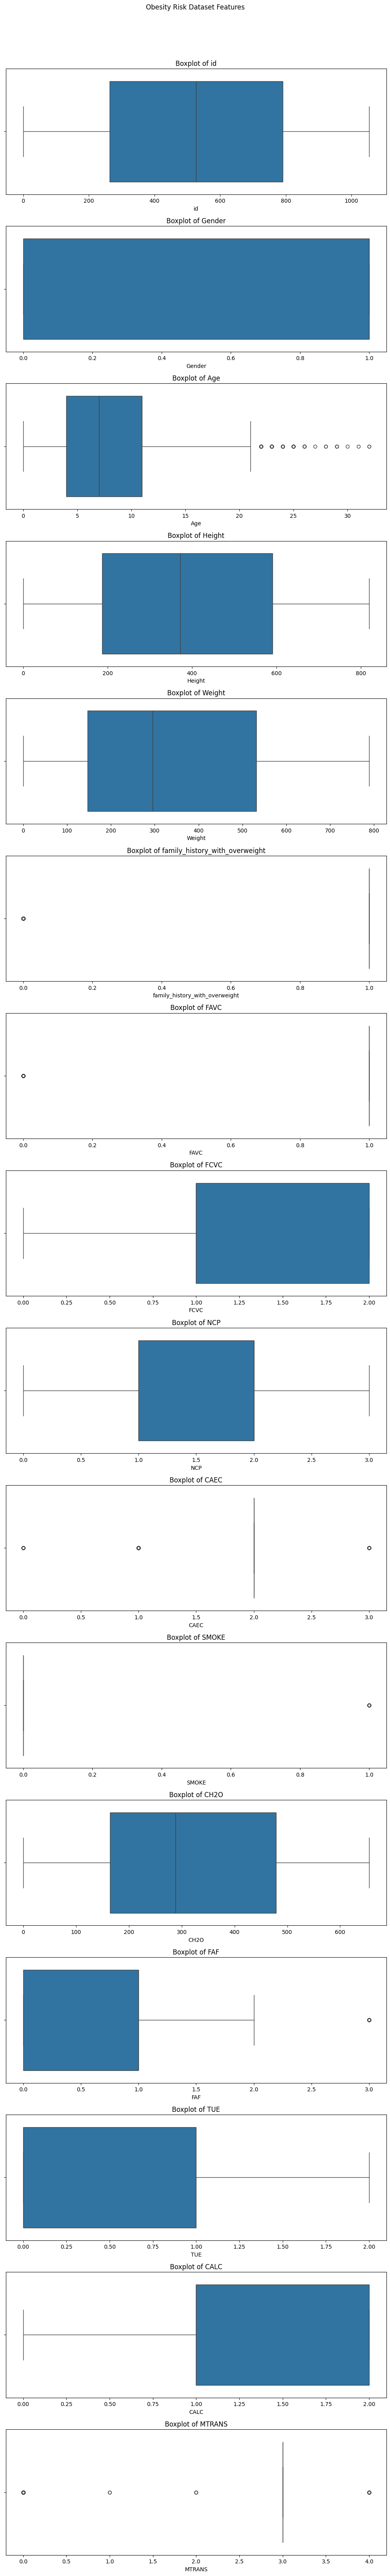

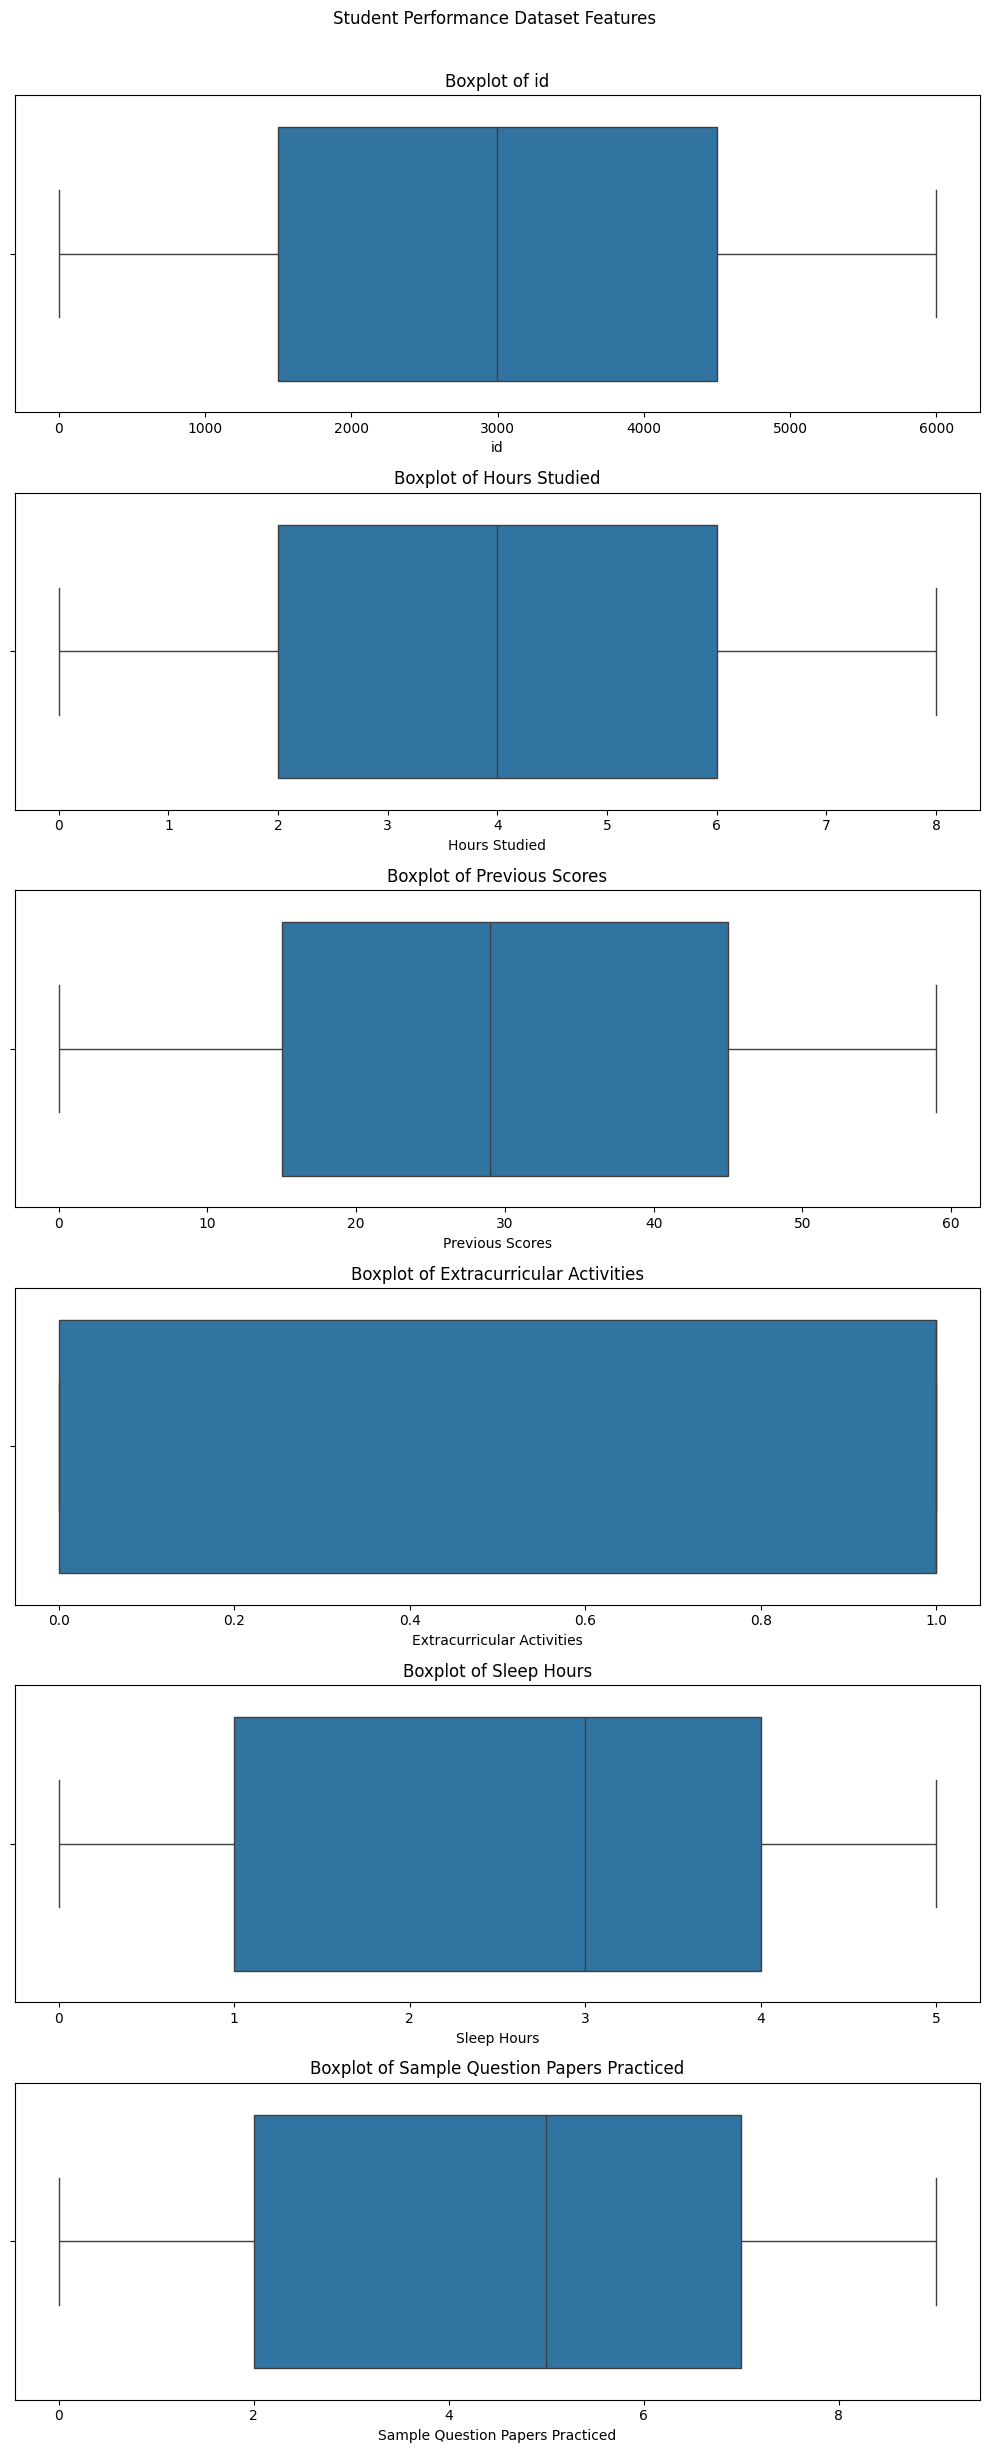

In [ ]:
import matplotlib.pyplot as plt

def create_boxplots(df, title):
    fig, axs = plt.subplots(nrows=len(df.columns), figsize=(10, len(df.columns)*4))
    for i, col in enumerate(df.columns):
        sns.boxplot(x=df[col], ax=axs[i])
        axs[i].set_title(f'Boxplot of {col}')
    plt.tight_layout()
    fig.suptitle(title, y=1.02)
    return fig

boxplot_obesity = create_boxplots(X_obesity, "Obesity Risk Dataset Features")

boxplot_student_performance = create_boxplots(X_student_performance, "Student Performance Dataset Features")

plt.show()

In [ ]:
obesity_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,23.880569,1.701977,86.632155,2.218957,2.522275,2.013240,0.743128,0.368720
std,6.087826,0.092295,26.367803,0.610177,0.829500,0.614805,0.838692,0.577543
min,14.000000,1.481682,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.000000,1.629466,66.000000,2.000000,2.000000,1.548393,0.000000,0.000000
50%,22.000000,1.700627,83.014033,2.000000,3.000000,2.000000,1.000000,0.000000
75%,26.000000,1.769081,107.298825,3.000000,3.000000,2.504052,1.000000,1.000000
max,55.000000,1.931263,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
student_performance_df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,5.015667,69.601333,6.527833,4.567167,55.425667
std,2.586994,17.384498,1.697068,2.875274,19.280243
min,1.000000,40.000000,4.000000,0.000000,11.000000
25%,3.000000,55.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,56.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


walaupun ada beberapa atribut data yang memiliki outlier. namun Dari hasil statistik deskriptif kedua data, kita dapat mengabaikan outlier yang ada karena distribusi data mendekati normal (akan dianggap sebagai distribusi normal), tambah lagi, model machine learning CART tidak terlalu sensitif terhadap outlier sehingga presentase outlier yang kecil dapat diabaikan (outlier tidak perlu ditangani dalam kasus ini).

## CART (Classification and Regression Tree)

### Decision Tree

Decision Tree merupakan model yang beroperasi dengan struktur berbentuk Binary Tree, di mana setiap node hanya dapat memiliki dua child node paling banyak. Dalam bidang data science, model ini diterapkan dalam konteks Supervised Learning, yaitu model dibentuk berdasarkan data training dan selanjutnya digunakan untuk membuat prediksi terhadap data yang disajikan. Data training yang digunakan akan diolah menjadi sebuah rangkaian aturan dalam bentuk Binary Tree. Aturan-aturan ini selanjutnya digunakan untuk proses prediksi pada dataset lain.

#### Training

Function di bawah ini merupakan function yang dapat digunakan untuk menghitung metrics hasil testing, baik untuk kasus regresi, maupun kasus klasifikasi.

In [ ]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score

def classification_metrics(prediction, y_test):
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print(f'Accuracy: {accuracy_score(y_test, prediction)}')
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

##### Dataset Obesity Risk

In [ ]:
# Melakukan training pada model decision tree
# Sesuaikan nama variable X_train dan y_train kamu
dtc_obes = DecisionTreeClassifier(max_depth=3, random_state=42)

###### Cross Validation

Kemudian kita akan melakukan cross validation dengan number_split = 5. Cross Validation digunakan untuk membagi dataset menjadi beberapa bagian (*fold*). Strategi ini dapat Anda gunakan untuk dapat menghasilkan model yang lebih stabil performance-nya serta dapat juga digunakan untuk menghindari overfitting data.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Variabel dapat disesuaikan oleh masing-masing mahasiswa. Di preprocessing tahap akhir ekspektasinya mahasiswa buat train test split

scores = cross_val_score(dtc_obes, X_train_obes, y_train_obes, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation:{scores.mean()}')

Hasil Evaluasi cross validation:0.677690898844745


In [ ]:
dtc_obes.fit(X_train_obes, y_train_obes)


DecisionTreeClassifier(max_depth=3, random_state=42)

##### Dataset Student Performance

###### Cross Validation

In [ ]:
# Melakukan training pada model decision tree
# Sesuaikan nama variable X_train dan y_train kamu
dtr_perform = DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
# Variabel dapat disesuaikan oleh masing-masing mahasiswa. Di preprocessing tahap akhir ekspektasinya mahasiswa membuat train test split dengan variabel tersebut

scores2 = cross_val_score(dtr_perform, X_train_perform, y_train_perform, scoring='r2', cv=kfold)
print(f'Hasil Evaluasi cross validation:{scores2.mean()}')

Hasil Evaluasi cross validation:0.8887839085915468


In [ ]:
dtr_perform.fit(X_train_perform, y_train_perform)


DecisionTreeRegressor(max_depth=3, random_state=42)

#### Evaluation

##### Dataset Obesity Risk

In [ ]:
# Predict testing data
prediction = dtc_obes.predict(X_test_obes)

# Eval the prediction
classification_metrics(prediction, y_test_obes)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.86      0.66      0.75        29
           1       0.58      0.44      0.50        25
           2       0.61      0.32      0.42        34
           3       0.90      0.81      0.85        32
           4       1.00      0.97      0.98        30
           5       0.54      0.73      0.62        30
           6       0.47      0.81      0.60        31

    accuracy                           0.68       211
   macro avg       0.71      0.68      0.67       211
weighted avg       0.71      0.68      0.67       211



Confusion Matrix



prediction,0,1,2,3,4,5,6
actual,,,,,,,
0,19,7,0,0,0,3,0
1,3,11,0,0,0,10,1
2,0,0,11,2,0,1,20
3,0,0,6,26,0,0,0
4,0,0,0,1,29,0,0
5,0,1,0,0,0,22,7
6,0,0,1,0,0,5,25




Accuracy: 0.6777251184834123
F1 Macro Average: 0.6740916044629898
F1 Micro Average: 0.6777251184834123
Precision Macro Average: 0.7083614351953805
Precision Micro Average: 0.6777251184834123
Recall Macro Average: 0.6768076340658622
Recall Micro Average: 0.6777251184834123



##### Dataset Admission Prediction

In [ ]:
# Predict testing data
prediction = dtr_perform.predict(X_test_perform)

# Eval the prediction
regression_metrics(prediction, y_test_perform)

MAE: 4.971128588227571
MSE: 37.80608263835943
RMSE: 6.1486651102787695
R_squared: 0.8988566323448737


#### Hyperparameter


Hyperparameter adalah parameter yang dapat kita sesuaikan atau konfigurasi sebelum memulai proses pembangunan model. Tujuan dari penyesuaian ini adalah untuk mengoptimalisasi performa model sehingga diharapkan dapat berfungsi lebih efektif.

> Ada beberapa jenis hyperparameter yang terdapat dalam beragam algoritma machine learning, termasuk dalam algoritma Decision Tree. Beberapa hyperparameter yang ada dalam algoritma Decision Tree yang disediakan oleh modul sklearn.tree antara lain:

- `criterion`: Metrik yang digunakan untuk mengevaluasi kualitas pemisahan node, contohnya:
- `squared_error`: menggunakan reduksi varians sebagai kriteria seleksi fitur dan meminimalkan kerugian L2 dengan menggunakan mean dari setiap node terminal
- `friedman_mse`: menghitung mean squared error dengan Friedman's improvement score untuk kemungkinan pemisahan (tidak perlu khawatir, ini tidak akan keluar di ujian)
- `absolute_error`: meminimalkan kerugian L1 dengan menggunakan median dari setiap node terminal
- `poisson`: memanfaatkan reduksi dalam Poisson deviance untuk menentukan pemisahan
- `max_depth`: Membatasi kedalaman maksimum dari pohon
- `min_samples_split`: Menentukan jumlah minimum sampel yang dibutuhkan untuk memecah sebuah node internal
Untuk informasi lebih detail, Anda bisa merujuk pada dokumentasi berikut:
[sklearn decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [ ]:
# Melakukan training pada model decision tree
# Decision tree yang dibangun memiliki hyperparameter max_depth=2
dtr_md6 = DecisionTreeRegressor(max_depth=2, random_state=2024)
dtr_md6.fit(X_train_perform, y_train_perform)

# Memprediksi data testing
predicted6 = dtr_md6.predict(X_test_perform)

# Menampilkan metrics evaluasi
regression_metrics(predicted6, y_test_perform)

MAE: 7.528967158774051
MSE: 81.63410693120761
RMSE: 9.03515948565423
R_squared: 0.7816026439575248


Perubahan *hyperparameter* dapat mempengaruhi performa dari model. Pada awalnya dengan `max_depth = 3` model menghasilkan *MAE* 5.079970180698733 dan *MSE* 38.90106178562068. Setelah dilakukan perubahan *hyperparameter* dengan `max_depth = 2`, kita dapat melihat bahwa ada penurunan pada performa model dengan *MAE* 7.559478016354806 dan *MSE* 81.96320679474273

Bagaimana jika hyperparameter lain diubah? Silakan eksplorasi perubahan hyperparameter lain secara mandiri ya!😃

### Visualisasi Decision Tree yang Dihasilkan



Kita bisa melakukan visualisasi terhadap serangkaian aturan yang membentuk Decision Tree yang telah dibangun. Salah satu caranya adalah dengan menggunakan modul `sklearn.tree.plot_tree` dengan bantuan `matplotlib`.

Berikut adalah contoh visualisasi decision tree pada dataset Student Performance tanpa max depth:

In [ ]:
# Membangun model tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_perform, y_train_perform)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(tree_model, feature_names=pd.Series(X_perf.columns).array))

|--- Previous Scores <= 29.50
|   |--- Previous Scores <= 13.50
|   |   |--- Hours Studied <= 3.50
|   |   |   |--- Previous Scores <= 6.50
|   |   |   |   |--- Hours Studied <= 1.50
|   |   |   |   |   |--- Previous Scores <= 2.50
|   |   |   |   |   |   |--- id <= 1685.50
|   |   |   |   |   |   |   |--- id <= 741.00
|   |   |   |   |   |   |   |   |--- id <= 238.00
|   |   |   |   |   |   |   |   |   |--- Sample Question Papers Practiced <= 6.00
|   |   |   |   |   |   |   |   |   |   |--- value: [9.00]
|   |   |   |   |   |   |   |   |   |--- Sample Question Papers Practiced >  6.00
|   |   |   |   |   |   |   |   |   |   |--- value: [7.00]
|   |   |   |   |   |   |   |   |--- id >  238.00
|   |   |   |   |   |   |   |   |   |--- Sleep Hours <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- Sleep Hours <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- Sleep Hours >  0.50
|   |   |   |   |   |   |   |

Dapat dilihat bahwa *decision tree* yang dihasilkan terlihat sangat kompleks. Hal tersebut beresiko untuk terjadi *overfitting* dan juga sulit untuk divisualisasikan. Oleh karena itu, akan perubahan *hyperparameter* pada model decision tree bisa membuat model yang dihasilkan tidak terlalu kompleks.

In [ ]:
# Membangun model tree
dt_md4 = DecisionTreeRegressor(max_depth=3)
dt_md4.fit(X_train_perform, y_train_perform)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(dt_md4, feature_names=pd.Series(X_perf.columns).array))

|--- Previous Scores <= 29.50
|   |--- Previous Scores <= 13.50
|   |   |--- Hours Studied <= 3.50
|   |   |   |--- value: [13.66]
|   |   |--- Hours Studied >  3.50
|   |   |   |--- value: [26.53]
|   |--- Previous Scores >  13.50
|   |   |--- Hours Studied <= 4.50
|   |   |   |--- value: [30.29]
|   |   |--- Hours Studied >  4.50
|   |   |   |--- value: [42.72]
|--- Previous Scores >  29.50
|   |--- Previous Scores <= 45.50
|   |   |--- Hours Studied <= 3.50
|   |   |   |--- value: [45.79]
|   |   |--- Hours Studied >  3.50
|   |   |   |--- value: [57.62]
|   |--- Previous Scores >  45.50
|   |   |--- Hours Studied <= 3.50
|   |   |   |--- value: [60.47]
|   |   |--- Hours Studied >  3.50
|   |   |   |--- value: [73.06]



Pada model decision tree di atas, dilakukan pembatasan pada kedalaman maksimal dengan mengatur nilai dari `max_depth`. Perubahan *hyperparameter* ini dilakukan untuk mendapatkan model dengan jenis yang sama namun atribut yang berbeda. Untuk pemilihan *hyperparameter* apa yang tepat, biasanya memperhatikan persebaran data pada dataset yang diberikan dan dibantu oleh pengalaman dalam melakukan serangkaian kegiatan data science.  

Pemilihan dari *hyperparameter* biasanya disebut sebagai *Hyperparameter Tuning* dan ada metode yang dinamakan Grid Search Cross Validation yang bisa digunakan untuk memilih *hyperparameter* terbaik dari beberapa *hyperparameter* yang disediakan berdasarkan kriteria tertentu. Jika kalian tertarik terkait dengan penerapan Grid Search Cross Validation, silakan mencari dan mempraktikannya sebagai latihan mandiri.

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Ensemble Learning

*Ensemble Learning* adalah proses di mana kita menggunakan banyak model untuk mendapatkan hasil yang lebih baik dibandingkan dengan menggunakan satu model saja. Salah satu jenis *ensemble learning* adalah *bagging* (*bootstrap aggregating*).

Pada metode *bagging*, setiap model akan dilatih menggunakan subhimpunan dari data *training* (tidak keseluruhan data latih digunakan dalam setiap proses *training*). Pada subhimpunan data yang satu dengan yang lainnya bisa mengandung data yang sama (tidak harus beda semua), hal inilah yang disebut dengan *bootstrap sampling*. Nantinya, setiap model yang telah dilatih akan melakukan proses prediksi terhadap data yang baru. Hasil prediksi akhir didapatkan melalui sistem *majority voting* di mana hasil akhirnya akan menggunakan hasil prediksi yang paling banyak muncul pada model-model yang telah dibuat.

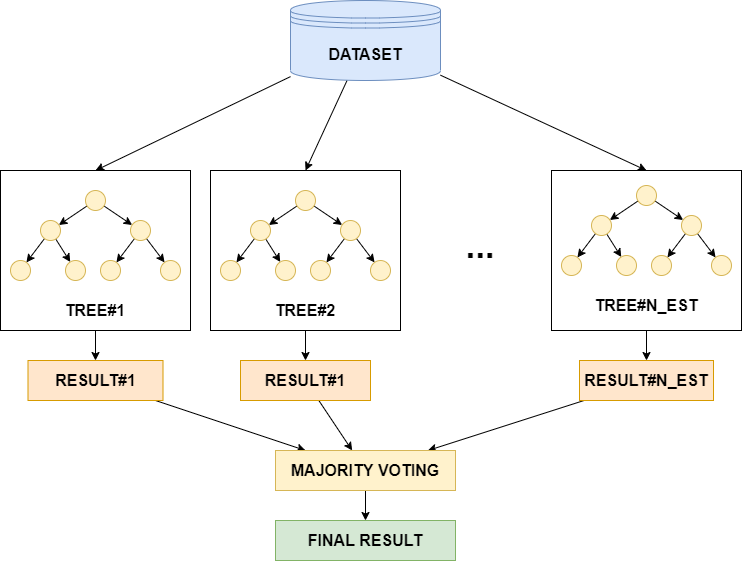

Sumber: Lab 4 KASDD Gasal 2023

### *Random Forest*

*Random Forest* merupakan salah satu variasi dari konsep *bagging* pada *ensemble learning* yang menggunakan Decision Tree sebagai basis modelnya. Setiap model yang dibangun berupa Decision Tree dan nantinya model tersebut dilatih dan digunakan untuk melakukan prediksi. Output dari Random Forest itu sendiri merupakan hasil prediksi yang paling banyak muncul di antara model-model Decision Tree.

In [ ]:
# Melakukan training pada model random forest
rf_md = RandomForestRegressor()
rf_md.fit(X_train_perform, y_train_perform)

# Memprediksi data testing
predicted = rf_md.predict(X_test_perform)

# Menampilkan metrics
regression_metrics(predicted, y_test_perform)

MAE: 1.85215
MSE: 5.416782833333333
RMSE: 2.3273982970977127
R_squared: 0.9855083727435987


In [ ]:
rf_red_paramless = RandomForestClassifier()
rf_red_paramless.fit(X_train_obes, y_train_obes)

predicted = rf_red_paramless.predict(X_test_obes)

classification_metrics(predicted, y_test_obes)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.72      0.84      0.78        25
           2       0.97      1.00      0.99        34
           3       1.00      1.00      1.00        32
           4       1.00      0.97      0.98        30
           5       0.96      0.87      0.91        30
           6       0.91      0.97      0.94        31

    accuracy                           0.93       211
   macro avg       0.93      0.92      0.92       211
weighted avg       0.93      0.93      0.93       211



Confusion Matrix



prediction,0,1,2,3,4,5,6
actual,,,,,,,
0,24,5,0,0,0,0,0
1,2,21,0,0,0,1,1
2,0,0,34,0,0,0,0
3,0,0,0,32,0,0,0
4,0,0,1,0,29,0,0
5,0,2,0,0,0,26,2
6,0,1,0,0,0,0,30




Accuracy: 0.9289099526066351
F1 Macro Average: 0.9241205494419821
F1 Micro Average: 0.9289099526066351
Precision Macro Average: 0.9272424710848356
Precision Micro Average: 0.9289099526066351
Recall Macro Average: 0.9240944965305367
Recall Micro Average: 0.9289099526066351



Terlihat bahwa terdapat perubahan pada metriknya.

Diharapkan untuk mempelajari kelebihan dan kekurangan dari setiap jenis model yang dipelajari agar kita bisa mengetahui pada dataset seperti apa suatu jenis model cocok untuk digunakan. Agar model yang dihasilkan lebih baik, kita juga harus bisa memilih *hyperparameter* yang sesuai dengan permasalahan yang ingin diselesaikan.

Adapun beberapa *hyperparameter* yang dapat kita eksplorasi pada Random Forest:
* `n_estimators`: Berapa banyak decision tree yang akan membentuk random forest
* `max_depth`: Kedalaman maksimal dari masing-masing Decision Tree
* `min_samples_split`: Jumlah sample minimal yang diperlukan untuk memecah suatu internal node pada setiap Decision Tree

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [dokumentasi Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

## Hyperparameter Tuning

Hyperparameter tuning dapat digunakan untuk mendapatkan hasil evaluasi yang terbaik untuk suatu model. Misalkan kita ingin mendapatkan parameter terbaik untuk model Decision Tree, maka kita harus mencoba berbagai kombinasi hyperparameter yang diinginkan. Untuk mempermudah mencari hyperparameter yang tepat, kita dapat menggunakan modul GridSearchCV dari library Scikit-Learn. Informasi lebih lanjut mengenai GridSearchCV dapat diakses [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Beberapa parameter yang sering digunakan, yaitu:
- `estimator`: model yang akan digunakan
- `param_grid`: kombinasi berbagai hyperparameter yang akan digunakan.
- `cv`: jumlah cross-validation yang ingin digunakan

In [ ]:
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [7, 10, 15, 30],
               'max_depth' : [3, 5, 9, 12, None]}

dt = DecisionTreeRegressor()
clf = GridSearchCV(estimator= dt,
                   param_grid=param_grid, cv= 5)

clf.fit(X_train_perform, y_train_perform)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 5, 9, 12, None],
                         'min_samples_split': [7, 10, 15, 30]})

In [ ]:
clf.best_params_

{'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 30}

In [ ]:
best_hp = DecisionTreeRegressor(**clf.best_params_)
best_hp.fit(X_train_perform, y_train_perform)
predicted = best_hp.predict(X_test_perform)
regression_metrics(predicted, y_test_perform)

MAE: 2.0926783593213525
MSE: 6.8631625304787125
RMSE: 2.619763831050179
R_squared: 0.9816388442638389


Sekarang kita mendapatkan kombinasi terbaik dari berbagai kombinasi hyperparameter yang telah kita coba.

## Kaggle Competition!

Dalam rangka menerapkan pemahaman kalian pada materi CART dan sebagai sarana untuk berlatih, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 4 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Regression Case](https://www.kaggle.com/t/72f29cab31c54875825b92eb03053534)
*   [Kaggle Competition Classification Case](https://www.kaggle.com/t/8eaa13f32e244834a49647f12a7efb1a)

**Penilaian**

Untuk mendapatkan nilai penuh pada lab 4 ini, kalian **diwajibkan** untuk mengikuti kedua kompetisi kaggle di atas.


# Latihan Soal

## SOAL 2 [10]

### SOAL 2a
[2.5] Bangun dan latih 2 model decision tree (decision tree regressor untuk student performance dan decision tree classifier untuk obesity risk) dengan memberikan nilai pada *hyperparameter*:
- `max_depth = 7`
- `random_state = 4048`.

**Jawaban**

In [ ]:
# decision tree classifier untuk obesity risk
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1055 non-null   object 
 1   Gender                          1055 non-null   object 
 2   Age                             1055 non-null   int64  
 3   Height                          1055 non-null   float64
 4   Weight                          1055 non-null   float64
 5   family_history_with_overweight  1055 non-null   object 
 6   FAVC                            1055 non-null   object 
 7   FCVC                            1055 non-null   int64  
 8   NCP                             1055 non-null   int64  
 9   CAEC                            1055 non-null   object 
 10  SMOKE                           1055 non-null   object 
 11  CH2O                            1055 non-null   float64
 12  FAF                             10

In [ ]:
tree_obesity1 = DecisionTreeClassifier(max_depth=7, random_state = 4048)
tree_obesity1.fit(X_train_obes, y_train_obes)

DecisionTreeClassifier(max_depth=7, random_state=4048)

In [ ]:
# decision tree regressor untuk student performance
student_performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                6000 non-null   object 
 1   Hours Studied                     6000 non-null   int64  
 2   Previous Scores                   6000 non-null   int64  
 3   Extracurricular Activities        6000 non-null   object 
 4   Sleep Hours                       6000 non-null   int64  
 5   Sample Question Papers Practiced  6000 non-null   int64  
 6   Performance Index                 6000 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 328.2+ KB


In [ ]:
tree_perf1 = DecisionTreeRegressor(max_depth=7, random_state = 4048)
tree_perf1.fit(X_train_perform, y_train_perform)

DecisionTreeRegressor(max_depth=7, random_state=4048)

### SOAL 2b
[2.5]  Visualisasikan 2 model decision tree (decision tree regressor untuk student performance dan decision tree classifier untuk obesity risk) yang didapat pada soal 1a!

**Jawaban**

In [ ]:
# visualisasi decision tree classifier untuk obesity risk
print(tree.export_text(tree_obesity1, feature_names=pd.Series(X_obesity.columns).array))

|--- Weight <= 426.50
|   |--- Weight <= 115.50
|   |   |--- Height <= 260.50
|   |   |   |--- Weight <= 32.00
|   |   |   |   |--- Height <= 13.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Height >  13.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- Weight >  32.00
|   |   |   |   |--- Height <= 18.00
|   |   |   |   |   |--- CH2O <= 185.00
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- CH2O >  185.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Height >  18.00
|   |   |   |   |   |--- id <= 833.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- id >  833.50
|   |   |   |   |   |   |--- Weight <= 55.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Weight >  55.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |--- Height >  260.50
|   |   |   |--- Weight <= 114.50
|   |   |   |   |--- CAEC <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- CAEC >  0.50
|   |   |   |   |   |--- class

In [ ]:
# visualisasi decision tree regressor untuk student performance
print(tree.export_text(tree_perf1, feature_names=pd.Series(X_perf.columns).array))

|--- Previous Scores <= 29.50
|   |--- Previous Scores <= 13.50
|   |   |--- Hours Studied <= 3.50
|   |   |   |--- Previous Scores <= 6.50
|   |   |   |   |--- Hours Studied <= 1.50
|   |   |   |   |   |--- Previous Scores <= 2.50
|   |   |   |   |   |   |--- id <= 1685.50
|   |   |   |   |   |   |   |--- value: [6.43]
|   |   |   |   |   |   |--- id >  1685.50
|   |   |   |   |   |   |   |--- value: [4.27]
|   |   |   |   |   |--- Previous Scores >  2.50
|   |   |   |   |   |   |--- Hours Studied <= 0.50
|   |   |   |   |   |   |   |--- value: [6.89]
|   |   |   |   |   |   |--- Hours Studied >  0.50
|   |   |   |   |   |   |   |--- value: [10.07]
|   |   |   |   |--- Hours Studied >  1.50
|   |   |   |   |   |--- Previous Scores <= 1.50
|   |   |   |   |   |   |--- Hours Studied <= 2.50
|   |   |   |   |   |   |   |--- value: [8.12]
|   |   |   |   |   |   |--- Hours Studied >  2.50
|   |   |   |   |   |   |   |--- value: [12.27]
|   |   |   |   |   |--- Previous Scores >  1.50
|   

### SOAL 2c

[2.5]  Jika model decision tree regressor diberikan data aktual Performance Index 80, tentukan attribut-attribut yang menghasilkan hasil prediksi terdekat dengan data aktual tersebut. Berikan juga Mean Squared Error dari hasil prediksi dengan data aktual `Performance Index` dari data X?    

**Catatan:** Tidak harus melakukan implementasi kode pada bagian ini

Berdasarkan nomor 2b (Model Decision Tree Regressor pada
Study Performance), ada value yang paling mendekati aktual Performance Index 80.

yaitu 79.38, attributnya:

Previous Scores > 85.50

Hours Studied > 4.50

Previous Scores > 92.50

Hours Studied <= 7.50

Hours Studied <= 5.50

Previous Scores <= 94.50

Maka Previous Scoresnya berada pada rentang 92.51 sampai 94.50  dan Hours Studied nya berada pada rentang 4.51 sampai 5.50

Mean Absolute Error:
MAE = |Prediction - Actual = |80 - 79.38] = 0.62

**Jawaban**

### SOAL 2d

[2.5]  Untuk decision tree classifier, tentukan atribut-atribut dari suatu level obesitas yang paling berpotensi untuk dikategorikan sebagai kelas 2. Jika terdapat berbagai kemungkinan pasangan atribut yang paling berpotensi, tuliskan salah satu kemungkinan atribut-atributnya.

## SOAL 3 [15]

### SOAL 3a

[2] Implementasikan 2 model Random Forest (Random Forest Regressor untuk Student Performance dan Random Forest Classifier untuk Obesity Risk) Implementasi pada soal ini akan menggunakan nilai *hyperparameter*
- `max_depth = 7`
- `random_state = 4048`

**Jawaban**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Melakukan training pada model random forest
rf_performance_7a = RandomForestRegressor(max_depth = 7, random_state = 4048)
rf_performance_7a.fit(X_train_perform, y_train_perform)

RandomForestRegressor(max_depth=7, random_state=4048)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Melakukan training pada model random forest
rf_obesity_7a = RandomForestClassifier(max_depth = 7, random_state = 4048)
rf_obesity_7a.fit(X_train_obes, y_train_obes)

RandomForestClassifier(max_depth=7, random_state=4048)

### SOAL 3b

[8] Lakukan cross validation untuk kedua model random forest pada nomor 3a dan tampilkan rata-rata hasil evaluasi cross validationnya dengan menggunakan scoring metric yang paling tepat untuk masing-masing kasus yang ingin diprediksi. Untuk mendapatkan poin penuh pada nomor ini, berikan pula alasan pemilihan masing-masing scoring metric tersebut. Terakhir, jangan lupa untuk memanggil method fit untuk membangun tree berdasarkan data training.

In [ ]:
scores_obes = cross_val_score(dtc_obes, X_train_obes, y_train_obes, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation:{scores_obes.mean()}')

Hasil Evaluasi cross validation:0.677690898844745


Dalam melakukan cross validation untuk model klasifikasi Decision Tree pada obesity risk, penggunaan skor akurasi sebagai metrik evaluasi adalah pilihan yang tepat karena akurasi menyediakan ukuran yang langsung dan intuitif mengenai seberapa sering model melakukan prediksi yang benar, sangat cocok terutama jika distribusi kelas dalam data seimbang.

In [ ]:
scores_perform = cross_val_score(dtr_perform, X_train_perform, y_train_perform, scoring='r2', cv=kfold)
print(f'Hasil Evaluasi cross validation:{scores_perform.mean()}')

Hasil Evaluasi cross validation:0.8887839085915468


Pilihan menggunakan skor R^2 untuk cross validation pada model Decision Tree Regressor untuk student performance ini didasarkan pada kemampuan R² untuk mengukur proporsi variabilitas dalam data yang dapat dijelaskan oleh model.

### SOAL 3c

[5] Jelaskan bagaimana perbedaaan cara pengambilan keputusan pada model Random Forest Regressor dan Classifier di tiap node-nya dan apa pengaruhnya terhadap hasil keputusan?

**Random Forest Classifier:** Memilih kelas yang paling sering muncul di node tersebut dengan melihat frekuensi kemunculan kelas. Ini berarti dalam proses pengambilan keputusan, kelas dengan frekuensi tertinggi di node tersebut akan menjadi pilihan.

**Random Forest Regressor:** Mengambil keputusan berdasarkan nilai tengah atau mean dari target dalam sampel di node itu. Dalam konteks regresi, ini berarti nilai yang dipilih untuk mewakili node tersebut adalah rata-rata atau median dari nilai target yang ada di sampel.

Dengan demikian, model klasifikasi cenderung memilih kelas yang dominan di node, sedangkan model regresi memilih nilai yang mewakili tendensi sentral (rata-rata atau median) dari target dalam sampel.

## SOAL 4 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan regresi (Dataset Student Performance) (`X_test`) menggunakan model yang sudah dibangun pada soal 2 dan 3.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai MAE, MSE, RMSE, dan $R^{2}$ dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi dari kedua model yang sudah didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

**Jawaban**

In [ ]:
# prediksi data testing decision tree
prediksi_regresi_dt = tree_perf1.predict(X_test_perform)

# Call the metrics function
print('Prediksi Tree Soal 2')
regression_metrics(prediksi_regresi_dt, y_test_perform)

Prediksi Tree Soal 2
MAE: 2.2081285873106693
MSE: 7.5072246364442226
RMSE: 2.7399315021445743
R_squared: 0.9799157720534875


In [ ]:
# prediksi data testing random forest
prediksi_regresi_rf = rf_performance_7a.predict(X_test_perform)

# Call the metrics function
print('Prediksi Tree Soal 3')
regression_metrics(prediksi_regresi_rf, y_test_perform)

Prediksi Tree Soal 3
MAE: 1.9184654284296672
MSE: 5.739405981460665
RMSE: 2.3957057376607556
R_squared: 0.9846452525944619


**Hasil Analisis Evaluasi Kedua Model Regresi**

Hasil evaluasi model menunjukkan keunggulan Random Forest dibandingkan dengan Decision Tree Regressor tunggal. Bukti pertama adalah metrik evaluasi pada model Random Forest (soal nomor 3) yang lebih tinggi, menunjukkan kemampuan model ini untuk lebih baik memahami dan mempelajari pola data. Hal ini diperkuat oleh nilai R² yang lebih tinggi pada model Random Forest; nilai R², yang berkisar antara 0 dan 1, mengukur seberapa baik model regresi menjelaskan variasi data. Semakin mendekati 1, semakin baik model dalam menjelaskan variasi tersebut. Dengan demikian, model Random Forest Regressor (soal nomor 3) lebih efektif dalam menggambarkan varians data.

Error yang dihasilkan model soal nomor 3 juga lebih baik bisa dilihat bahwa MAE (Mean Absolute Error), MSE (Mean Squared Error), dan RMSE (Root Mean Squared Error) pada model soal nomor 3 lebih kecil dibanding model soal nomor 2.

## SOAL 5 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan klasifikasi (Dataset Obesity Risk) (`X_test`) menggunakan model yang sudah dibangun pada soal 1 dan 2.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai Accuracy, Precision, Recall, dan F1-Score dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi yang didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

**Jawaban**

In [ ]:
# prediksi data testing decision tree
prediksi_klasifikasi_dt = tree_obesity1.predict(X_test_obes)

# Call the metrics function
print('Prediksi Tree Soal 2')
classification_metrics(prediksi_klasifikasi_dt, y_test_obes)

Prediksi Tree Soal 2
Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.73      0.76      0.75        25
           2       0.89      0.97      0.93        34
           3       1.00      0.97      0.98        32
           4       1.00      0.97      0.98        30
           5       0.70      0.87      0.78        30
           6       0.91      0.68      0.78        31

    accuracy                           0.87       211
   macro avg       0.88      0.87      0.87       211
weighted avg       0.88      0.87      0.87       211



Confusion Matrix



prediction,0,1,2,3,4,5,6
actual,,,,,,,
0,25,4,0,0,0,0,0
1,3,19,0,0,0,3,0
2,0,0,33,0,0,0,1
3,0,0,1,31,0,0,0
4,0,0,1,0,29,0,0
5,0,3,0,0,0,26,1
6,0,0,2,0,0,8,21




Accuracy: 0.8720379146919431
F1 Macro Average: 0.8675633569725747
F1 Micro Average: 0.8720379146919431
Precision Macro Average: 0.8758949209259768
Precision Micro Average: 0.8720379146919431
Recall Macro Average: 0.8674514127119145
Recall Micro Average: 0.8720379146919431



In [ ]:
# prediksi data testing random forest
prediksi_klasifikasi_rf = rf_obesity_7a.predict(X_test_obes)

# Call the metrics function
print('Prediksi Tree Soal 3')
classification_metrics(prediksi_klasifikasi_rf, y_test_obes)

Prediksi Tree Soal 3
Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.74      0.80      0.77        25
           2       0.94      1.00      0.97        34
           3       1.00      1.00      1.00        32
           4       1.00      0.97      0.98        30
           5       0.89      0.80      0.84        30
           6       0.81      0.84      0.83        31

    accuracy                           0.90       211
   macro avg       0.90      0.90      0.90       211
weighted avg       0.90      0.90      0.90       211



Confusion Matrix



prediction,0,1,2,3,4,5,6
actual,,,,,,,
0,25,4,0,0,0,0,0
1,3,20,0,0,0,0,2
2,0,0,34,0,0,0,0
3,0,0,0,32,0,0,0
4,0,0,1,0,29,0,0
5,0,2,0,0,0,24,4
6,0,1,1,0,0,3,26




Accuracy: 0.9004739336492891
F1 Macro Average: 0.8954864655896897
F1 Micro Average: 0.9004739336492891
Precision Macro Average: 0.8970616024187452
Precision Micro Average: 0.9004739336492891
Recall Macro Average: 0.8953493299433232
Recall Micro Average: 0.9004739336492891



**Hasil Analisis Evaluasi Kedua Model Klasifikasi** <br>
Berdasarkan evaluasi, model Random Forest Classifier dari soal 3 terbukti lebih unggul daripada model Decision Tree Classifier dari soal 2. Keunggulan ini terlihat dari nilai akurasi yang lebih tinggi pada model Random Forest, menandakan model tersebut memiliki kemampuan prediksi yang lebih akurat. Akurasi mengukur seberapa sering model membuat prediksi yang tepat, sehingga nilai akurasi yang lebih tinggi berarti model lebih dekat mendekati kebenaran data aktual.

F1 Score merupakan gabungan dari presisi dan recall, dua metrik kunci lainnya. Skor ini berkisar antara 0 hingga 1, dengan skor yang lebih tinggi mengindikasikan performa model yang lebih baik. Oleh karena itu, model Random Forest menunjukkan performa yang lebih unggul dibandingkan dengan Decision Tree tunggal.

Precision score mengevaluasi seberapa akurat prediksi positif yang dibuat oleh model, sedangkan recall score mengukur kemampuan model dalam mengidentifikasi semua kasus positif yang sebenarnya. Keseimbangan antara kedua skor ini sangat diutamakan. Pada model Random Forest, terlihat bahwa kedua metrik ini, yaitu recall dan precision, meningkat bersamaan dibandingkan dengan penggunaan Decision Tree Classifier tunggal, menunjukkan performa yang lebih seimbang dan efektif.

## SOAL 6 [15]

Gunakan GridSearchCV untuk mencari hyperparameter yang baik untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier.

### SOAL 6a
[9]
Proses Grid search diwajibkan melakukan tuning pada hyperparameter berikut: **criterion, max_depth, min_samples_split**.
*Namun, kalian masih boleh mengambil hyperparameter lain.*

**Jawaban**

In [ ]:
# Grid search model Decision Tree Classifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [2, 4, 8],
    'random_state':[42]
}

# Inisialisasi model Decision Tree Classifier
dt_obesity = DecisionTreeClassifier()

# Buat objek GridSearchCV
grid_search_dt_obesity = GridSearchCV(estimator=dt_obesity, param_grid=param_grid, cv=5)

grid_search_dt_obesity.fit(X_train_obes, y_train_obes)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 5, 10, 15],
                         'random_state': [42]})

In [ ]:
# Grid search model Random Forest Classifier
param_grid = {
    'n_estimators': [50, 75, 100],
    'min_samples_split': [2, 5, 10, 20],
    'max_depth': [5, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['gini', 'entropy'],
    'random_state':[42]
}

# Inisialisasi model Random Forest
rf_obesity = RandomForestClassifier()

# Buat objek GridSearchCV
grid_search_rf_obesity = GridSearchCV(estimator=rf_obesity, param_grid=param_grid, cv=5)
grid_search_rf_obesity.fit(X_train_obes, y_train_obes)

In [ ]:
# Grid search model Decision Tree Regressor
param_grid = {
    'criterion': ['absolute_error', 'poisson', 'friedman_mse', 'squared_error'],
    'min_samples_leaf': [1,2,4,10],
    'max_depth' : [None, 5, 8, 12, 16],
    'min_samples_split':[2,5,10, 25]
}
# Inisialisasi model Random Forest
dt_performance = DecisionTreeRegressor()

# Buat objek GridSearchCV
grid_search_dt_performance = GridSearchCV(estimator=dt_performance, param_grid=param_grid, cv=5)
grid_search_dt_performance.fit(X_train_perform, y_train_perform)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['absolute_error', 'poisson',
                                       'friedman_mse', 'squared_error'],
                         'max_depth': [None, 5, 8, 12, 16],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10, 25]})

In [ ]:
# Grid search model Random Forest Regressor
param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'min_samples_split': [2, 5, 10, 25],
    'max_depth' : [5, 8, 12, 16],
    'random_state' : [42]
}
# Inisialisasi model Random Forest
rf_performance = RandomForestRegressor()

# Buat objek GridSearchCV dengan n_jobs=-1 untuk paralelisasi
grid_search_rf_performance = GridSearchCV(estimator=rf_performance, param_grid=param_grid, cv=5, n_jobs=-1)

# Latih GridSearchCV pada data Anda
grid_search_rf_performance.fit(X_train_perform, y_train_perform)

### SOAL 6b
[1]

Tampilkan hyperparameter terbaik yang kalian dapatkan dari proses Grid Search untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier dari nomor 6a.

**Jawaban:**

In [ ]:
# parameter terbaik untuk Decision Tree Classifier
print("Berikut adalah hyperparameter terbaik untuk model Decision Tree Classifier:")
grid_search_dt_obesity.best_params_

Berikut adalah hyperparameter terbaik untuk model Decision Tree Classifier:


{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 42}

In [ ]:
# parameter terbaik untuk Random Forest Classifier
print("Berikut adalah hyperparameter terbaik untuk model Random Forest Classifier:")
grid_search_rf_obesity.best_params_

Berikut adalah hyperparameter terbaik untuk model Random Forest Classifier:


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
# parameter terbaik untuk Decision Tree Regressor
print("Berikut adalah hyperparameter terbaik untuk model Decision Tree Regressor:")
grid_search_dt_performance.best_params_

Berikut adalah hyperparameter terbaik untuk model Decision Tree Regressor:


{'criterion': 'poisson',
 'max_depth': None,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [ ]:
# parameter terbaik untuk Radnom Forest Regressor
print("Berikut adalah hyperparameter terbaik untuk model Random Forest Regressor:")
grid_search_rf_performance.best_params_

Berikut adalah hyperparameter terbaik untuk model Random Forest Regressor:


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

### SOAL 6c
[2.5]

Buatlah 2 model Random Forest (Random Forest Classifier dan Random Forest Regressor) dan 2 model Decision Tree (Decision Tree Classifier dan Decision Tree Regressor) berdasarkan hyperparameter yang kalian dapatkan dari **soal 6a**

**Jawaban**

In [ ]:
# model decision tree classifier berdasarkan hyperparameter terbaik
dt_obes_best = DecisionTreeClassifier(**grid_search_dt_obesity.best_params_)
dt_obes_best.fit(X_train_obes, y_train_obes)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, random_state=42)

In [ ]:
# model random forest classifier berdasarkan hyperparameter terbaik
rf_obes_best = RandomForestClassifier(**grid_search_rf_obesity.best_params_)
rf_obes_best.fit(X_train_obes, y_train_obes)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
# model decision tree regressor berdasarkan hyperparameter terbaik
dt_performance_best = DecisionTreeRegressor(**grid_search_dt_performance.best_params_)
dt_performance_best.fit(X_train_perform, y_train_perform)

DecisionTreeRegressor(criterion='poisson', min_samples_leaf=10,
                      min_samples_split=10)

In [ ]:
# model random forest regressor berdasarkan hyperparameter terbaik
rf_performance_best = RandomForestRegressor(**grid_search_rf_performance.best_params_)
rf_performance_best.fit(X_train_perform, y_train_perform)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

### SOAL 6d
[2.5]

Lakukan 4 buah prediksi (karena terdapat 4 model) dengan X_test dari masing-masing dataset dan **munculkan** hasil evaluasi terhadap label y_test dari masing-masing dataset.

**Note**: Terdapat 2 function metrics, yakni `regression_metrics` dan `classification_metrics`.


In [ ]:
# prediksi terhadap model Decision Tree Classifier dengan hyperparameter terbaik
predicted_dt_obes_best = dt_obes_best.predict(X_test_obes)

classification_metrics(predicted_dt_obes_best, y_test_obes)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.65      0.68      0.67        25
           2       0.94      0.97      0.96        34
           3       1.00      1.00      1.00        32
           4       1.00      0.97      0.98        30
           5       0.67      0.93      0.78        30
           6       1.00      0.68      0.81        31

    accuracy                           0.87       211
   macro avg       0.88      0.86      0.86       211
weighted avg       0.89      0.87      0.87       211



Confusion Matrix



prediction,0,1,2,3,4,5,6
actual,,,,,,,
0,23,6,0,0,0,0,0
1,3,17,0,0,0,5,0
2,0,0,33,0,0,1,0
3,0,0,0,32,0,0,0
4,0,0,1,0,29,0,0
5,0,2,0,0,0,28,0
6,0,1,1,0,0,8,21




Accuracy: 0.8672985781990521
F1 Macro Average: 0.8611532821554928
F1 Micro Average: 0.8672985781990521
Precision Macro Average: 0.8782836211407641
Precision Micro Average: 0.8672985781990521
Recall Macro Average: 0.86015871977267
Recall Micro Average: 0.8672985781990521



In [ ]:
# prediksi terhadap model Random Forest Classifier dengan hyperparameter terbaik
predicted_rf_obes_best = rf_obes_best.predict(X_test_obes)

classification_metrics(predicted_rf_obes_best, y_test_obes)

NameError: name 'rf_obes_best' is not defined

In [ ]:
# prediksi terhadap model Decision Tree Regressor dengan hyperparameter terbaik
predicted_dt_performance_best = dt_performance_best.predict(X_test_perform)

regression_metrics(predicted_dt_performance_best, y_test_perform)

MAE: 2.1000530320427764
MSE: 6.90276267541751
RMSE: 2.627310920964154
R_squared: 0.9815329012054941


In [ ]:
# prediksi terhadap model Random Forest Regressor dengan hyperparameter terbaik
predicted_rf_performance_best = rf_performance_best.predict(X_test_perform)

regression_metrics(predicted_rf_performance_best, y_test_perform)

NameError: name 'rf_performance_best' is not defined

## SOAL 7 [5]
TODO

1. [3] Jelaskan konsep bootstrapping dalam konteks Random Forest. Bagaimana hal ini berkontribusi pada keragaman dari berbagai decision trees yang terbentuk?
2. [2] Jelaskanlah bagaimana Random Forest dapat digunakan untuk masalah klasifikasi multi-kelas, seperti pada kasus prediksi kelas obesity risk pada Lab 4 ini.

1. Konsep bootstraping: pengambilan sample dilakukan dengan random dan with replacement dari data training set yang kita miliki untuk melatih setiap pohon keputusan dalam ensemble. Dengan melakukan ensemble, tiap tree pada random forest mungkin mendapatkan perlakukan pelatihan yang berbeda karena data yang diberikan merupakan subset data acak. Dengan metode ensemble ini, setiap pohon di Random Forest menerima subset data yang berbeda, memberikan variasi dalam proses pelatihan. Bootstrapping menyebabkan keragaman di antara pohon yang dibangun, dengan beberapa pohon menerima sampel data yang lebih variatif, sementara lainnya berfokus pada subset data tertentu.

2. Dalam klasifikasi multikelas oleh Random Forest Classifier, prediksi bisa didapat melalui soft-voting atau hard-voting.

**soft-voting:** Setiap pohon menghasilkan prediksi dalam bentuk probabilitas untuk masing-masing kelas. Probabilitas dari semua pohon kemudian digabungkan untuk menentukan probabilitas tiap kelas. Kelas dengan probabilitas tertinggi diambil sebagai prediksi akhir.

**hard-voting:** Setiap pohon memberikan prediksi satu kelas tertentu. Prediksi dari semua pohon digabungkan, dan kelas yang dipilih oleh mayoritas pohon diambil sebagai prediksi akhir.

**Jawaban**


## SOAL 8 [5]

1. [2] Berdasarkan hasil evaluasi dari nomor 6, berikan hasil analisis yang anda dapatkan. Apakah hyperparameter tuning meningkatkan performa keseluruhan model? Sertakan pula alasan dari penjelasan yang anda berikan.
2. [3] Random Forest memasukkan unsur *randomness* melalui bootstrapping dan *feature selection*. Bagaimanakah hal ini dapat memengaruhi reproduksibilitas hasil, dan apa yang dapat dilakukan untuk memastikan *output* yang konsisten?

1. **Data Obesity Risk - Performa Lebih Baik Sebelum Tuning**:
    - Ini bisa terjadi jika model awal sudah cukup baik atau optimal untuk dataset tersebut, dan tuning malah mengarah ke overfitting atau pemilihan parameter yang kurang tepat.
    - Kemungkinan lain, dataset tersebut mungkin tidak terlalu kompleks atau sudah cukup diprediksi dengan baik oleh model dengan parameter default.
    - Hasil ini juga bisa menunjukkan bahwa rentang atau nilai hyperparameter yang dipilih saat tuning tidak sesuai untuk dataset ini.
    - Ini menunjukkan, hyperparameter tuning tidak selalu menjamin peningkatan performa. Terkadang, pemilihan model yang tepat dan preprocessing data yang efektif lebih penting.
**Data Student Performance - Performa Lebih Baik Setelah Tuning**:
    - Hal ini menunjukkan bahwa tuning berhasil menemukan kombinasi hyperparameter yang lebih sesuai untuk dataset ini, mungkin dengan mengurangi overfitting atau meningkatkan generalisasi model.
    - Penemuan ini bisa jadi karena dataset memiliki kompleksitas tertentu yang memerlukan tuning untuk optimalisasi.
    - Peningkatan ini juga menegaskan bahwa untuk beberapa kasus dan dataset, penyesuaian hyperparameter dapat secara signifikan meningkatkan kemampuan model dalam mempelajari dan membuat prediksi.

2.
**Bootstrapping**: Dalam Random Forest, setiap pohon dibangun dari sampel bootstrap dari data, yang merupakan sampel acak dengan penggantian. Akibatnya, setiap pohon menggunakan subset data yang berbeda, menyebabkan variasi dalam pembangunan model.
**Feature Selection Random**: Saat membangun setiap split di pohon, Random Forest secara acak memilih atribut. Ini menambahkan variasi lebih lanjut karena setiap pohon dalam forest mungkin mempertimbangkan fitur yang berbeda.

**Pengaruh pada Reproduksibilitas**:

- Karena Random Forest mengandalkan proses random ini, dua pelatihan model yang berbeda dengan parameter yang sama dapat menghasilkan hasil yang sedikit **berbeda**.

**Cara Memastikan Output yang Konsisten**:

1. **Menggunakan Random Seed**: Menetapkan nilai **`random_state`** dalam Random Forest memungkinkan untuk reproduksi hasil yang konsisten. Ini memastikan bahwa proses random yang sama digunakan setiap kali model dilatih, sehingga menghasilkan hasil yang sama.
2. **Meningkatkan Jumlah Trees**: Meskipun setiap tree mungkin bervariasi karena randomness, keseluruhan forest cenderung stabil saat jumlah pohon meningkat. Dengan memiliki banyak pohon, kesalahan individual cenderung saling meniadakan, mengarah pada hasil yang lebih konsisten.
3. **Cross-Validation**: Melakukan cross-validation dengan beberapa pengulangan juga dapat membantu menilai konsistensi model dan kinerja rata-ratanya.